### **AQI-ExtraTreesRegressor**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

### Before appling linear regression, I did feature engineering such as dealig with outliers, null values and correlation analysis. After that data has saven into cleaned data format.

### **Import necessary libraries**

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from pathlib import Path
file_path = Path('D:\Internship\IBM Internship\Project1\Air-Quality-Index-prediction_with_deployment\ML_Applied_Word\PreProcess\df_cleaned_data.pkl')
with open(file_path,'rb') as file:
    df= pickle.load(file)

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ruchi\AppData\Local\Temp\ipykernel_67980\2755762934.py:2: SyntaxWarning: invalid escape sequence '\I'
  file_path = Path('D:\Internship\IBM Internship\Project1\Air-Quality-Index-prediction_with_deployment\ML_Applied_Word\PreProcess\df_cleaned_data.pkl')


In [5]:
# with open('/content/drive/MyDrive/Google_colab_project/df.pkl','rb') as file:
#     df= pickle.load(file)

In [6]:
#Read value
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,10.8,17.0,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,10.8,17.0,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,10.8,17.0,4.3,1019.4,82.0,0.6,4.8,11.1,154.037500
3,10.8,17.0,4.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [7]:
#Seperating dependent and independent variables 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

### **ExtraTreesRegressor Implementation without Hyper Tuning**

In [9]:
from sklearn import ensemble
extra_tree=ensemble.ExtraTreesRegressor
extra_tree_model = extra_tree(n_estimators=100, n_jobs=-1, random_state=100)

### **Compile model**

In [10]:
extra_tree_model.fit(X_train, y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=100)

### **Evalution Model**

In [11]:
from sklearn import metrics
tree_pred=extra_tree_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, tree_pred))
print('MSE:', metrics.mean_squared_error(y_test, tree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

MAE: 36.063735665137614
MSE: 2648.1231792355775
RMSE: 51.45991818139218


For Extra TreeRegressor without any hyperparameter tuning, we got RMSE(Root Mean Square Error) value is around 33.4 which is lower than SVR-linear kernel and SVR-polynomial kernel and linear regressor RMSE values. So, next, we will try to find some optimal parameters for Extra TreeRegressthrough we can able to reduce that RMSE value.

In [12]:
#plot the importances #
importances = extra_tree_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in extra_tree_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]

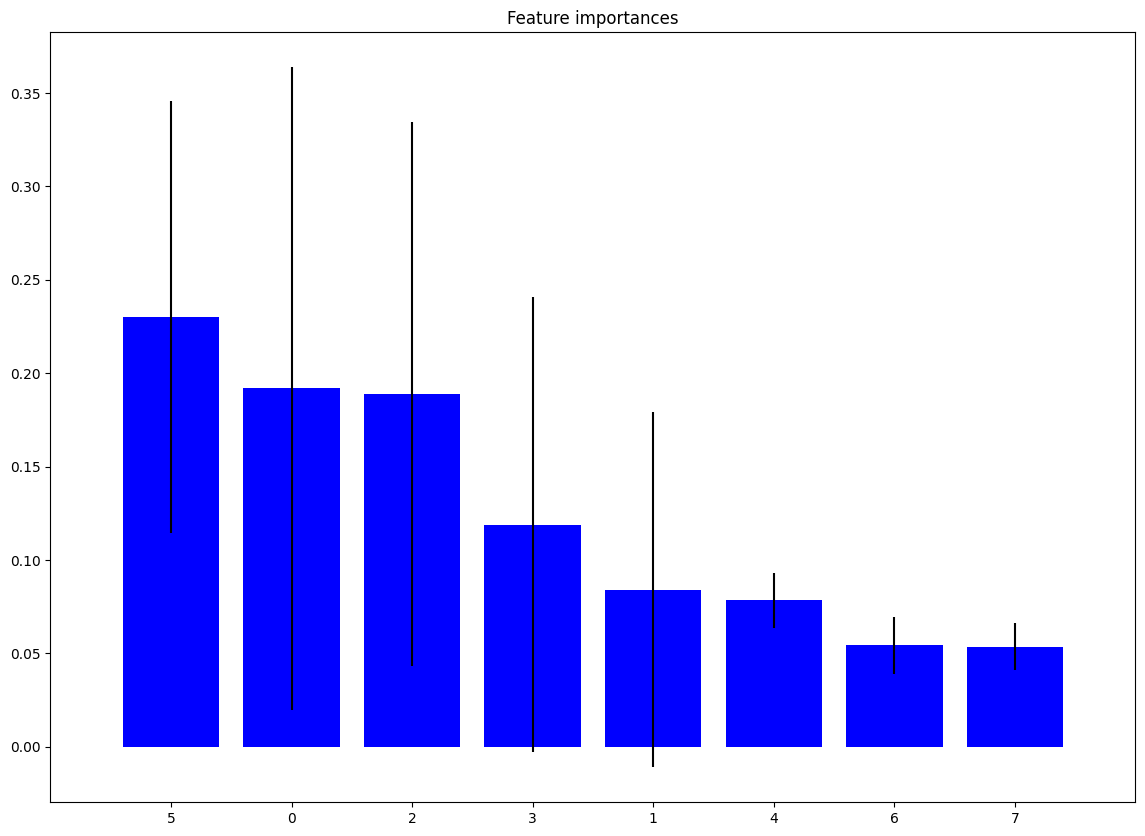

In [13]:
plt.figure(figsize=(14,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
plt.show()

### **ExtraTreesRegressor Implementation with Hyper Tuning-Randomized SearchCV**

### Randomized SearchCV1

In [14]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 12)]
# Number of criterion
criterion=["mse", "mae"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 50, num = 6)]
# Minimum samples weight parameters
min_samples_split=[3,4,5,6,7]
# Minimum samples leaf parameters
min_samples_leaf=[1,2,3]
# features type 
max_features=["auto","sqrt", "log2"]



In [15]:
# Create the random grid
tree_random_grid1 = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'min_samples_split':min_samples_split}

print(tree_random_grid1)

{'n_estimators': [100, 145, 190, 236, 281, 327, 372, 418, 463, 509, 554, 600], 'criterion': ['mse', 'mae'], 'max_depth': [20, 26, 32, 38, 44, 50], 'min_samples_leaf': [1, 2, 3], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [3, 4, 5, 6, 7]}


In [16]:
extra_tree_regressor1=ensemble.ExtraTreesRegressor()

In [17]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
# Use the random grid to search for best hyperparameters
# First create the base model to tune

tree_random_cv1 = RandomizedSearchCV(estimator = extra_tree_regressor1, param_distributions = tree_random_grid1,
                               scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)
#xgb_random.fit(X_train,y_train)

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid with correct criterion values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse']  # Correct values
}

# Initialize the ExtraTreesRegressor
extra_trees = ExtraTreesRegressor()

# Initialize RandomizedSearchCV with correct parameters
tree_random_cv1 = RandomizedSearchCV(estimator=extra_trees, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
tree_random_cv1.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
114 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'poisson',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [19]:
tree_random_cv1.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
114 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
89 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'poisson',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [20]:
print(tree_random_cv1.best_params_)
#print(tree_random_cv1.best_scores_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'poisson', 'bootstrap': False}


### **Model Evaluation-1**

In [21]:
tree_rcv1_prediction=tree_random_cv1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, tree_rcv1_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv1_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv1_prediction)))

MAE: 35.848068934760455
MSE: 2548.588720746476
RMSE: 50.48354901100433


### Randomized SearchCV2

In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 800, num = 12)]
# Number of criterion
criterion=["mse", "mae"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 50, num = 10)]
# Minimum samples weight parameters
min_samples_split=[3,4,5]
# Minimum samples leaf parameters
min_samples_leaf=[1,2]
# features type 
max_features=["log2"]


In [23]:
# Create the random grid
tree_random_grid2= {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'min_samples_split':min_samples_split}

print(tree_random_grid2)

{'n_estimators': [300, 345, 390, 436, 481, 527, 572, 618, 663, 709, 754, 800], 'criterion': ['mse', 'mae'], 'max_depth': [20, 23, 26, 30, 33, 36, 40, 43, 46, 50], 'min_samples_leaf': [1, 2], 'max_features': ['log2'], 'min_samples_split': [3, 4, 5]}


In [24]:
extra_tree_regressor2=ensemble.ExtraTreesRegressor()

In [25]:

tree_random_cv2 = RandomizedSearchCV(estimator = extra_tree_regressor2, param_distributions = tree_random_grid2,
                               scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid with correct criterion values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse']  # Correct values
}

# Initialize the ExtraTreesRegressor
extra_trees = ExtraTreesRegressor()

# Initialize RandomizedSearchCV with correct parameters
tree_random_cv2 = RandomizedSearchCV(estimator=extra_trees, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
tree_random_cv2.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
114 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'poisson',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [27]:
tree_random_cv2.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
114 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'poisson',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [28]:
print(tree_random_cv2.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'poisson', 'bootstrap': False}


### **Model Evaluation-2**

In [29]:
tree_rcv2_prediction=tree_random_cv2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, tree_rcv2_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv2_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv2_prediction)))

MAE: 36.18530918477865
MSE: 2561.6610964178226
RMSE: 50.612855051042345


### **ExtraTreesRegressor Implementation with Hyper Tuning-GridSerchCV-1 Tuning**

In [30]:
extra_tree_rcv_1=ensemble.ExtraTreesRegressor()

In [31]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
## Hyper Parameter Optimization

params_gridcv1={
  "n_estimators": [int(x) for x in np.linspace(start = 550, stop = 800, num = 6)],
  "criterion":["mse", "mae"],
  "max_depth": [int(x) for x in np.linspace(36, 66, num = 5)],
# Minimum samples weight parameters
  "min_samples_split":[3,4,5],
# Minimum samples leaf parameters
  "min_samples_leaf":[1],
# features type 
  "max_features":["log2"]
  
}

In [32]:
tree_gcv_1=GridSearchCV( extra_tree_rcv_1,param_grid=params_gridcv1,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=10)


In [33]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with correct criterion values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse']  # Correct values
}

# Initialize the ExtraTreesRegressor
extra_trees = ExtraTreesRegressor()

# Initialize GridSearchCV with correct parameters
tree_gcv_1 = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model
tree_gcv_1.fit(X_train, y_train)


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2592 fits failed out of a total of 7776.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
528 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'poisson',
                                       'absolute_error', 'friedman_mse'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [34]:
tree_gcv_1.fit(X_train,y_train)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2592 fits failed out of a total of 7776.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1665 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valid

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'poisson',
                                       'absolute_error', 'friedman_mse'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [35]:
from sklearn import metrics
gcv1_prediction_1=tree_gcv_1.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, gcv1_prediction_1))
print('MSE:', metrics.mean_squared_error(y_test, gcv1_prediction_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gcv1_prediction_1)))

MAE: 36.437479972041544
MSE: 2650.901065282388
RMSE: 51.48690188079283


In [36]:
import pickle
# open a file, where you ant to store the data
file = open('tree_gridcv.pkl', 'wb')

# dump information to that file
pickle.dump(tree_gcv_1, file)

In [37]:
import pickle
# open a file, where you ant to store the data
file = open('tree_randomcv2.pkl', 'wb')

# dump information to that file
pickle.dump(tree_random_cv2, file)